In [1]:
import time
time.ctime()

'Fri Oct 13 14:26:18 2023'

This notebook has the aim to adapt the histograms, to reduce the rate of false positives in anomaly detection.

False positive are bar-images which deviate from the expected histogram curves but do not contain a visible anomaly. It is expected that the false positive reduction is an iterative process.

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import importlib as il
import glob
import itertools as it
import random
import warnings
import collections
import dill
import re
from collections import namedtuple

from scipy import optimize


%load_ext ipydex.displaytools
%matplotlib inline


In [3]:
import stage_2a_bar_selection as bs
il.reload(bs)
from stage_2a_bar_selection import (
    load_img,
    rgb,
    get_bbox_list,
    assign_row_col,
    index_combinations,
    find_missing_boxes,
    handle_missing_boxes,
    select_bar_from_file,
    get_raw_cell,
    get_angle,
    correct_angle,
    rotate_img,
    Container,
    pfname,
    analyze_img_fpath,
    get_hist_for_cell_pict,
    get_cell_key_from_fpath,
)


colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
vv = {"vmin": 0, "vmax": 255}


In [4]:
img_dir = "/home/ck/iee-ge/XAI-DIA/image_classification/stage2/critical_hist_false_positive"
img_path_list = glob.glob(f"{img_dir}/*.jpg")
img_path_list.sort()


In [5]:
hist_dict_path = "dicts"
total_res_fpath = f"{hist_dict_path}/_total_res.dill"
hist_dict_list = glob.glob(f"{hist_dict_path}/hist_*.dill")
hist_dict_list.sort()

In [6]:
with open(total_res_fpath, "rb") as fp:
        total_res = dill.load(fp)

In [7]:
fpath = img_path_list[0] ##:
fname = os.path.split(fpath)[1] ##:

fpath := '/home/ck/iee-ge/XAI-DIA/image_classification/stage2/critical_hist_false_positive/2023-06-26_06-19-48_C50_a6.jpg'

---

fname := '2023-06-26_06-19-48_C50_a6.jpg'

---

In [8]:
cell_key = get_cell_key_from_fpath(fpath) ##:

cell_key := ('a', '6')

---

(70.0, 100.0)

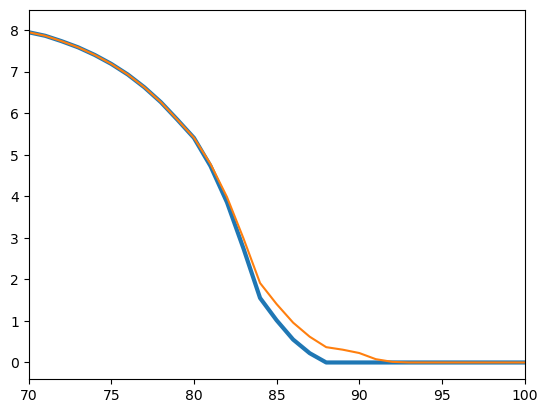

In [9]:
il.reload(bs)
HE = bs.HistEvaluation()
HE.fp_correct_for_cell(fpath)

plt.plot(HE.total_res[cell_key]["q_upper"], lw=3)
plt.plot(HE.total_res_adapted[cell_key]["q_upper"])
plt.xlim(70, 100)

In [10]:
HE.false_positive_correction(false_positive_dir=img_dir)

Backup written: dicts/_total_res_backup_2023-10-13__14-26-20.dill
File written: dicts/_total_res.dill
